In [61]:
import numpy as np
import pandas as pd
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
meter = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IS project/3_imputed_dataset/1_processed_dataset.csv', index_col=['Time'], parse_dates=True)
weather = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IS project/3_imputed_dataset/impute_weather.csv', index_col=['Time'], parse_dates=True).drop('Unnamed: 0', axis=1)
datasets = pd.concat([weather, meter], axis=1)
datasets.head()

pm10  pm2.5  temp  ...  rh_cmu  serve_techsci  test_animal
Time                                    ...                                    
2020-02-07 00:00:00   NaN    NaN   NaN  ...     NaN            NaN          NaN
2020-02-07 00:15:00   NaN    NaN   NaN  ...    3.55           1.14        15.23
2020-02-07 00:30:00   NaN    NaN   NaN  ...    3.36           1.15        18.17
2020-02-07 00:45:00   NaN    NaN   NaN  ...    3.58           0.96        22.40
2020-02-07 01:00:00   NaN    NaN   NaN  ...    3.84           1.05        18.56

[5 rows x 24 columns]

# Statistic Descriptive

In [17]:
datasets.describe().round(2).T

count   mean    std    min    25%    50%    75%     max
pm10           53901.0  28.46  41.19   1.00   4.00  12.00  39.00  737.00
pm2.5          53901.0  24.77  37.17   1.00   4.00  10.00  33.00  701.00
temp           53901.0  30.80   2.61  15.00  29.00  31.00  32.00   39.00
humid          53901.0  50.70  12.93  11.00  42.00  53.00  61.00   78.00
female_1       53952.0   4.12   2.23   0.00   2.36   4.10   5.74   11.33
female_2       53952.0   3.65   1.78   0.32   2.12   3.46   4.99    9.47
female_3       53950.0   3.08   1.85   0.26   1.66   2.94   4.22   10.24
female_4       53949.0   3.87   2.06   0.00   1.86   4.16   5.38    9.86
female_6       53952.0   3.61   2.30   0.00   1.60   3.52   5.15   12.92
female_8       53952.0   4.93   2.70   0.00   2.91   5.06   6.91   12.86
male_3         53952.0   4.43   2.58   0.00   2.12   4.66   6.40   14.08
male_4         53952.0   4.48   2.49   0.00   2.24   4.74   6.34   11.52
male_5         53918.0   4.65   2.09   0.51   2.94   4.74   6.37   11.00
bundit         53952.0   9.99   8.25   1.41   4.48   6.27  12.52   48.51
csb2_pailom    53952.0  31.32  18.95   0.51  16.64  23.61  40.50   98.30
dean_edu       53952.0   7.66   7.96   0.00   2.06   3.46  11.60   47.30
food_indus     53952.0  29.66  15.09   0.00  20.22  24.32  35.46   96.51
itsc_front     53918.0  25.85   6.58   9.47  21.50  23.04  28.93   59.65
language       53952.0   5.62   5.15   0.19   2.12   2.69   7.63   37.76
mechanical_2   53952.0   2.44   1.81   0.00   1.12   1.82   3.09   12.45
old_art        53952.0   6.87   5.99   0.00   2.63   4.48   9.08   38.53
rh_cmu         53952.0   7.97   4.78   0.38   4.61   5.57  10.80   29.63
serve_techsci  53952.0   1.38   1.24   0.00   0.67   0.82   1.63    8.38
test_animal    53952.0  32.74  11.17   0.00  24.93  31.48  39.68   79.10

## Smart Meter Box Plot

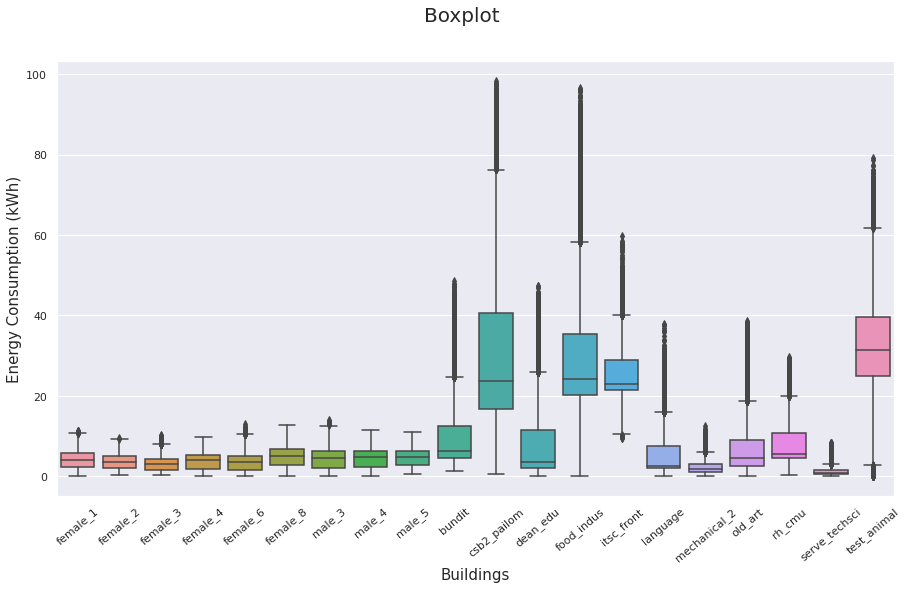

In [60]:
boxplot_df = pd.melt(datasets.iloc[:,4:])
colName = boxplot_df.variable.unique()

fig, ax = plt.subplots(1,1,figsize=(15,8))
ax = sns.boxplot(x="variable", y="value", data=boxplot_df)
ax.set_ylabel('Energy Consumption (kWh)', size=15)
ax.set_xlabel('Buildings', size=15)
ax.set_xticklabels(colName, rotation=40)
fig.suptitle('Boxplot', y=0.975, size=20)
plt.show()

## Smart Meter Histogram

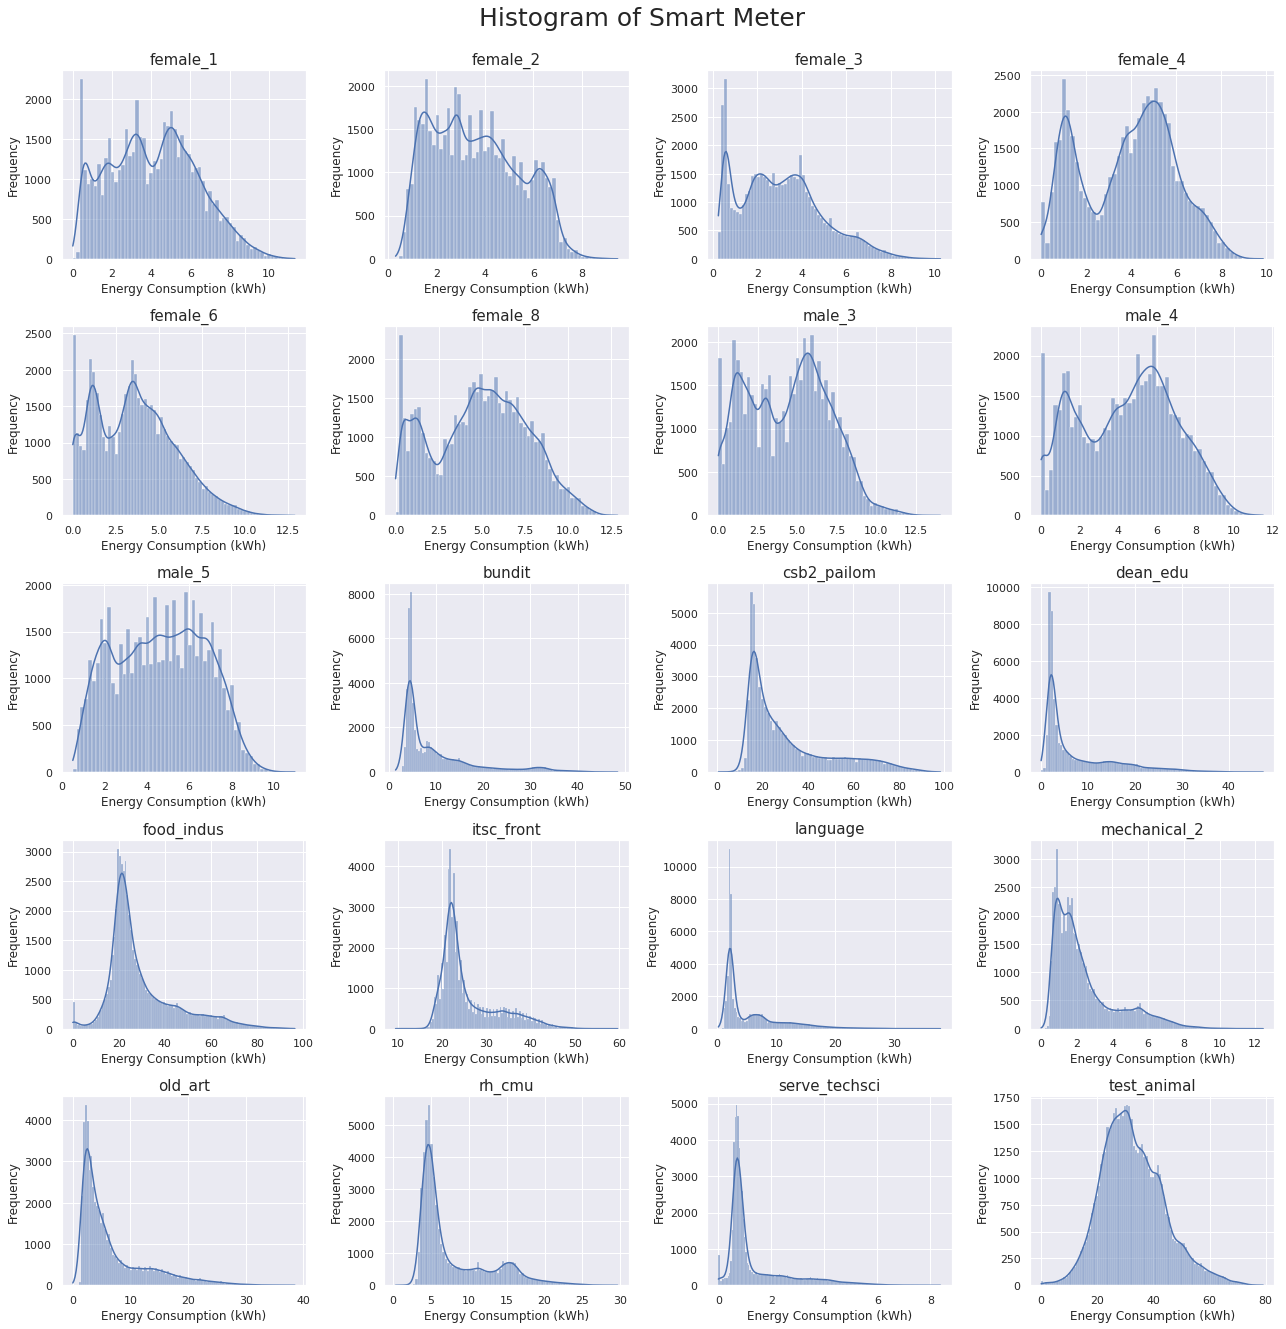

In [19]:
buildingName = datasets.iloc[:,4:].columns
i=0
fig, axes = plt.subplots(5,4, figsize=(18,18))
for row in range(5):
  for col in range(4):
      sns.histplot(data=datasets, x=buildingName[i], kde=True, ax=axes[row,col])
      axes[row,col].set_xlabel('Energy Consumption (kWh)')
      axes[row,col].set_ylabel('Frequency')
      axes[row,col].set_title(buildingName[i], size=15)
      i+=1
fig.tight_layout()
fig.suptitle('Histogram of Smart Meter', y=1.025, size=25)
plt.show()

In [20]:
'''for col in datasets.iloc[:,4:].columns:
  ax = sns.histplot(data=datasets, x=col, kde=True)
  ax.set_xlabel('Energy Consumption (kWh)')
  ax.set_ylabel('Frequency')
  ax.set_title(col, size=15)
  plt.show()'''

"for col in datasets.iloc[:,4:].columns:\n  ax = sns.histplot(data=datasets, x=col, kde=True)\n  ax.set_xlabel('Energy Consumption (kWh)')\n  ax.set_ylabel('Frequency')\n  ax.set_title(col, size=15)\n  plt.show()"

## Weather Histogram and Boxplot

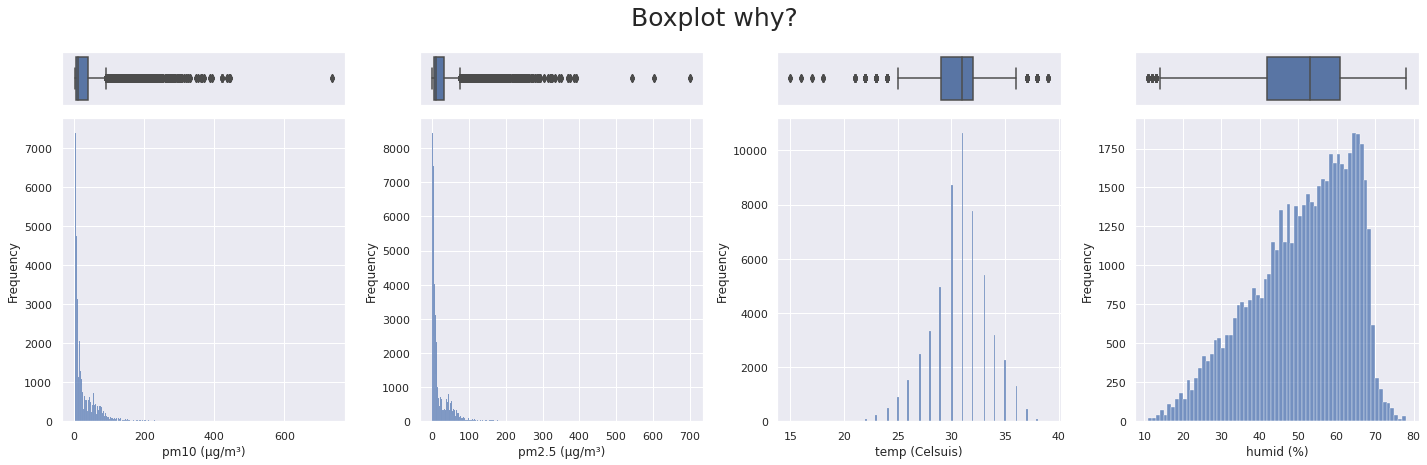

In [21]:
weather = datasets.iloc[:,:4]
colName = weather.columns
units = ['µg/m³', 'µg/m³', 'Celsuis', '%']
i=0

fig, (ax_box, ax_hist) = plt.subplots(2,4, gridspec_kw={"height_ratios": (.15, .85)}, figsize=(20,6))
for col in range(4):
  sns.boxplot(data=weather, x=colName[i], ax=ax_box[col])
  sns.histplot(data=weather, x=colName[i], ax=ax_hist[col])
  ax_box[col].get_xaxis().set_visible(False)
  ax_hist[col].set_ylabel('Frequency')
  ax_hist[col].set_xlabel('{} ({})'.format(colName[i], units[i]))
  i+=1

fig.tight_layout()
fig.suptitle('Boxplot why?', y=1.075, size=25) 
plt.show()

# Overview Line Plot (Seasonality & Semester)

- Semester
  - 2nd 2019 Semester: 16 Oct 2019
  - 1st 2020 Semester: 8 July 2020
  - 2nd 2020 Semester: 23 Nov 2020
  - 1st 2021 Semester: 21 June 2021
  - 2nd 2021 Semester: 8 Nov 2021


- Seasonal
    - Summer: March-June
    - Raining: July-Oct
    - Winter: Nov-Feb

## Weather data (Seasonality)

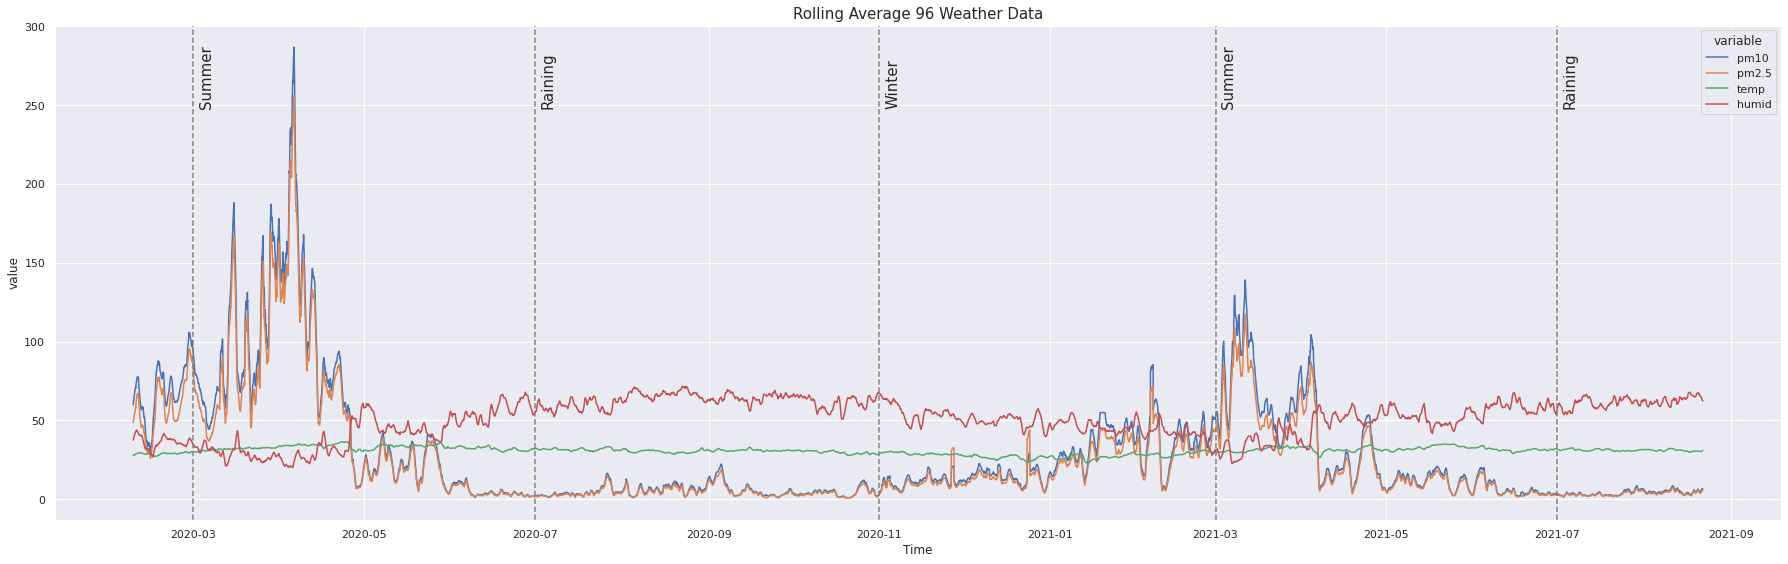

In [23]:
weather_rolling = datasets.iloc[:,:4].rolling(96).mean().reset_index()
df_rolling_melt = pd.melt(weather_rolling, id_vars='Time')

fig, axes = plt.subplots(1, 1, figsize=(25,8))
sns.lineplot(data=df_rolling_melt, x='Time', y='value', hue='variable')

plt.axvline(dt.datetime(2020, 3, 1), linestyle='--', color='grey')
plt.text(dt.datetime(2020, 3, 3),250,'Summer',rotation=90, size=15)
plt.axvline(dt.datetime(2020, 7, 1), linestyle='--', color='grey')
plt.text(dt.datetime(2020, 7, 3),250,'Raining',rotation=90, size=15)
plt.axvline(dt.datetime(2020, 11, 1), linestyle='--', color='grey')
plt.text(dt.datetime(2020, 11, 3),250,'Winter',rotation=90, size=15)
plt.axvline(dt.datetime(2021, 3, 1), linestyle='--', color='grey')
plt.text(dt.datetime(2021, 3, 3),250,'Summer',rotation=90, size=15)
plt.axvline(dt.datetime(2021, 7, 1), linestyle='--', color='grey')
plt.text(dt.datetime(2021, 7, 3),250,'Raining',rotation=90, size=15)

axes.set_title('Rolling Average 96 Weather Data', size=15)
fig.tight_layout()
plt.show()

## Smart Meter (Seasonality & Semester)

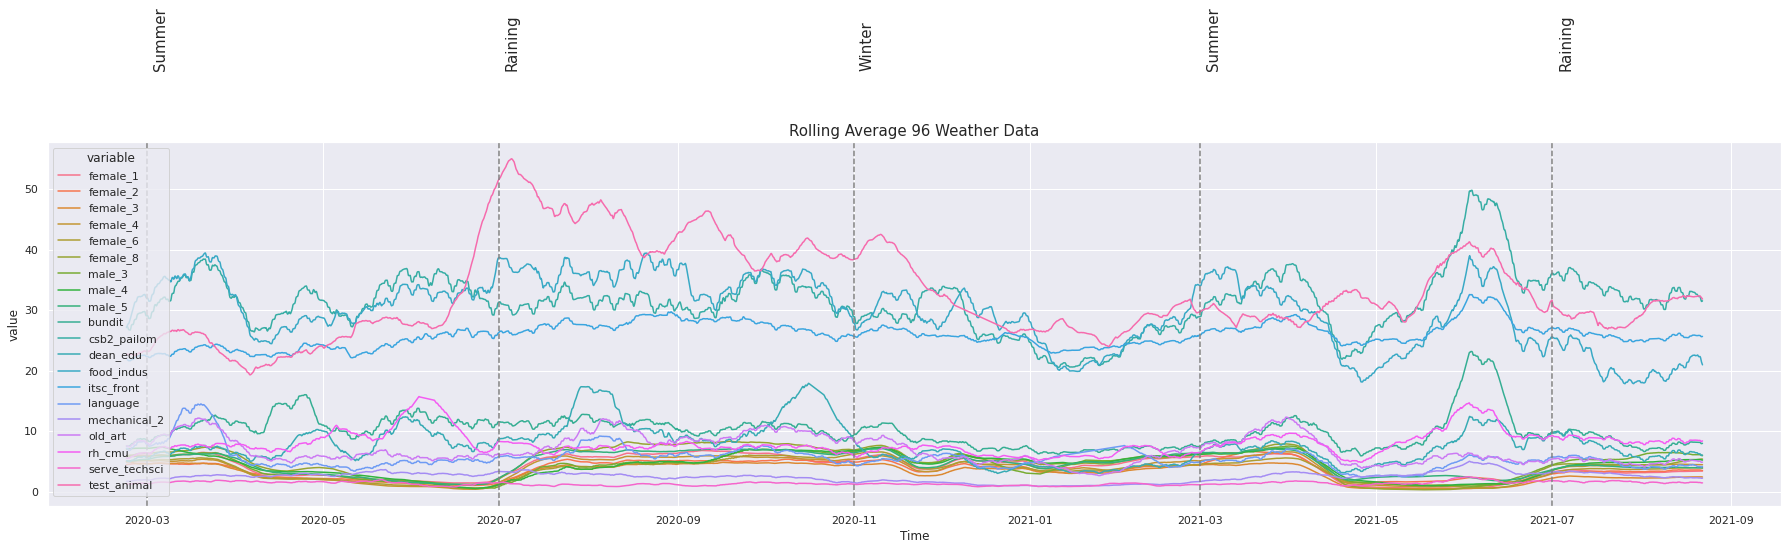

In [24]:
meter_hour = datasets.iloc[:,4:].resample('4H').mean()
meter_rolling = meter_hour.rolling(96).mean().reset_index()
df_rolling_melt = pd.melt(meter_rolling, id_vars='Time')

fig, axes = plt.subplots(1, 1, figsize=(25,8))
sns.lineplot(data=df_rolling_melt, x='Time', y='value', hue='variable')

plt.axvline(dt.datetime(2020, 3, 1), linestyle='--', color='grey')
plt.text(dt.datetime(2020, 3, 3),70,'Summer',rotation=90, size=15)
plt.axvline(dt.datetime(2020, 7, 1), linestyle='--', color='grey')
plt.text(dt.datetime(2020, 7, 3),70,'Raining',rotation=90, size=15)
plt.axvline(dt.datetime(2020, 11, 1), linestyle='--', color='grey')
plt.text(dt.datetime(2020, 11, 3),70,'Winter',rotation=90, size=15)
plt.axvline(dt.datetime(2021, 3, 1), linestyle='--', color='grey')
plt.text(dt.datetime(2021, 3, 3),70,'Summer',rotation=90, size=15)
plt.axvline(dt.datetime(2021, 7, 1), linestyle='--', color='grey')
plt.text(dt.datetime(2021, 7, 3),70,'Raining',rotation=90, size=15)

axes.set_title('Rolling Average 96 Weather Data', size=15)
fig.tight_layout()
plt.show()

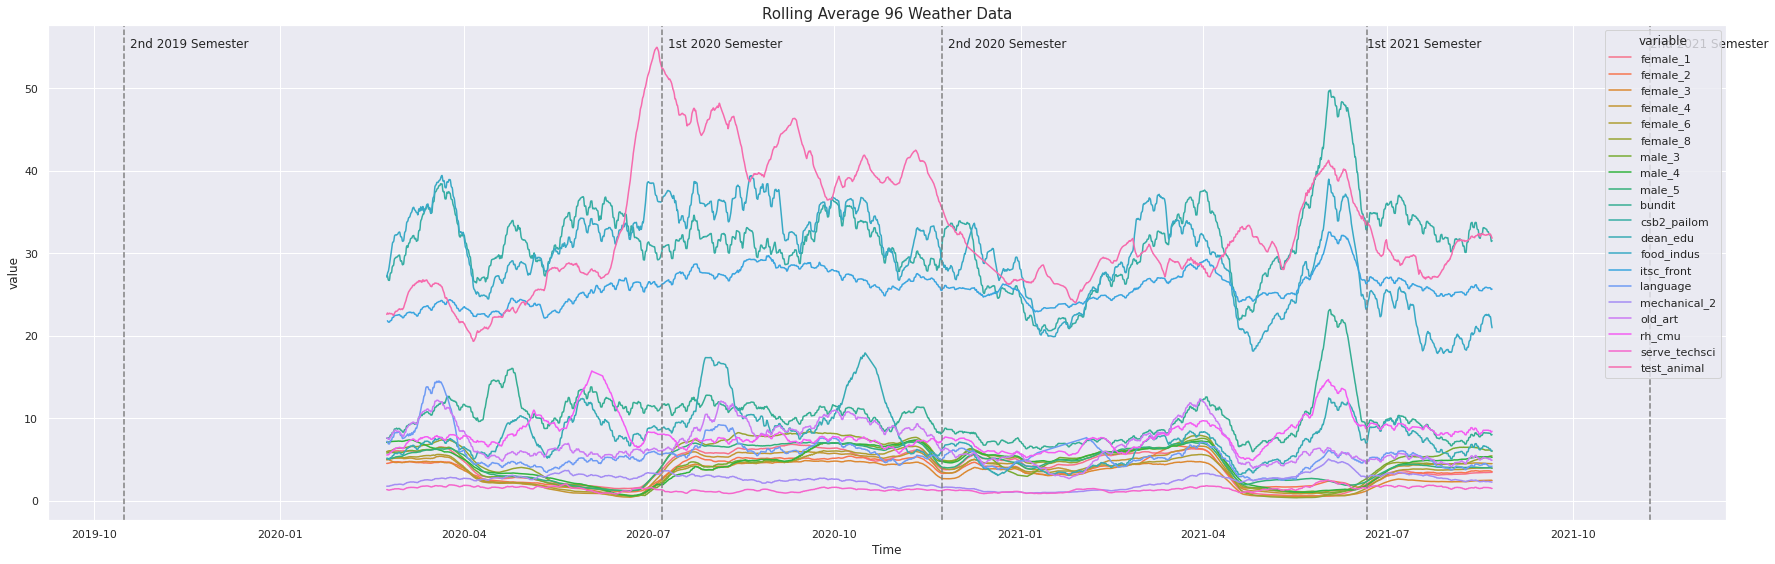

In [25]:
meter_hour = datasets.iloc[:,4:].resample('4H').mean()
meter_rolling = meter_hour.rolling(96).mean().reset_index()
df_rolling_melt = pd.melt(meter_rolling, id_vars='Time')

fig, axes = plt.subplots(1, 1, figsize=(25,8))
sns.lineplot(data=df_rolling_melt, x='Time', y='value', hue='variable')

plt.axvline(dt.datetime(2019, 10, 16), linestyle='--', color='grey')
plt.text(dt.datetime(2019, 10, 19),55,'2nd 2019 Semester', size=12)
plt.axvline(dt.datetime(2020, 7, 8), linestyle='--', color='grey')
plt.text(dt.datetime(2020, 7, 11),55,'1st 2020 Semester', size=12)
plt.axvline(dt.datetime(2020, 11, 23), linestyle='--', color='grey')
plt.text(dt.datetime(2020, 11, 26),55,'2nd 2020 Semester', size=12)
plt.axvline(dt.datetime(2021, 6, 21), linestyle='--', color='grey')
plt.text(dt.datetime(2021, 6, 21),55,'1st 2021 Semester', size=12)
plt.axvline(dt.datetime(2021, 11, 8), linestyle='--', color='grey')
plt.text(dt.datetime(2021,11, 8),55,'2nd 2021 Semester', size=12)

axes.set_title('Rolling Average 96 Weather Data', size=15)
fig.tight_layout()
plt.show()

# Plot heatmap every columns
### Why do you plot heatmap to explain the time series

In [26]:
def plot_heatmap(data, plot='weather'):
  month_name = ["Feb 2020", "Mar 2020", "Apr 2020", "May 2020", "Jun 2020", "July 2020", "Aug 2020", "Sept 2020", "Oct 2020",
                "Nov 2020", "Dec 2020", "Jan 2020", "Feb 2021", "Mar 2021", "Apr 2021", "May 2021", "Jun 2021", "July 2021", "Aug 2021"]
  df = pd.DataFrame(data).copy()
  name = df.columns[0]
  df['day'] = [i.day for i in df.index]
  df['month'] = [i.month for i in df.index]
  df['year'] = [i.year for i in df.index]
  df['day_of_week'] = [i.dayofweek for i in df.index]
  df['hour'] = [i.hour for i in df.index]
  df_pivot1 = pd.pivot_table(df, values=name, index=['year','month'] , columns=['day'], aggfunc=np.mean).round(2)
  df_pivot1.index = month_name
  df_pivot2 = pd.pivot_table(df, values=name, index=['day_of_week'] , columns=['hour'], aggfunc=np.mean).round(2)
  df_pivot2.index = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat','Sun']

  if plot == 'weather':
    color1, color2 = 'Blues', 'Purples'
    decimal = '.0f'
    figsize = (13,9)
  else:
    color1, color2 = 'YlOrBr', 'Blues'
    decimal = '.1f'
    figsize = (15,10)
  fig, axes = plt.subplots(2, 1, figsize=figsize, gridspec_kw={"height_ratios": (.725, .275)})
  sns.heatmap(df_pivot1, cmap=color1, robust=True, fmt=decimal, cbar=False,
                annot=True, linewidths=.5, annot_kws={'size':11}, ax=axes[0])
  sns.heatmap(df_pivot2, cmap=color2, robust=True, fmt=decimal, cbar=False,
                annot=True, linewidths=.5, annot_kws={'size':11}, ax=axes[1])
  axes[0].set_title('​Average in each day in each month', size=15)
  axes[1].set_title('Average in each hour in a week', size=15)
  fig.tight_layout()
  fig.suptitle(name, y=1.035, x=0.52, size=30)
  plt.show()

## Weather plot by 4 Heatmaps


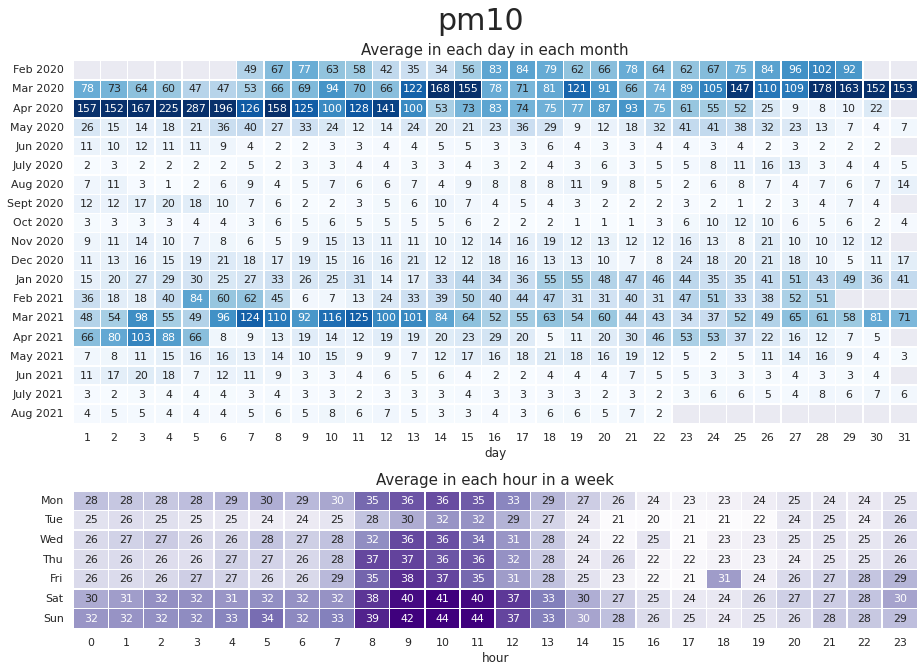

In [27]:
plot_heatmap(datasets['pm10'], plot='weather')

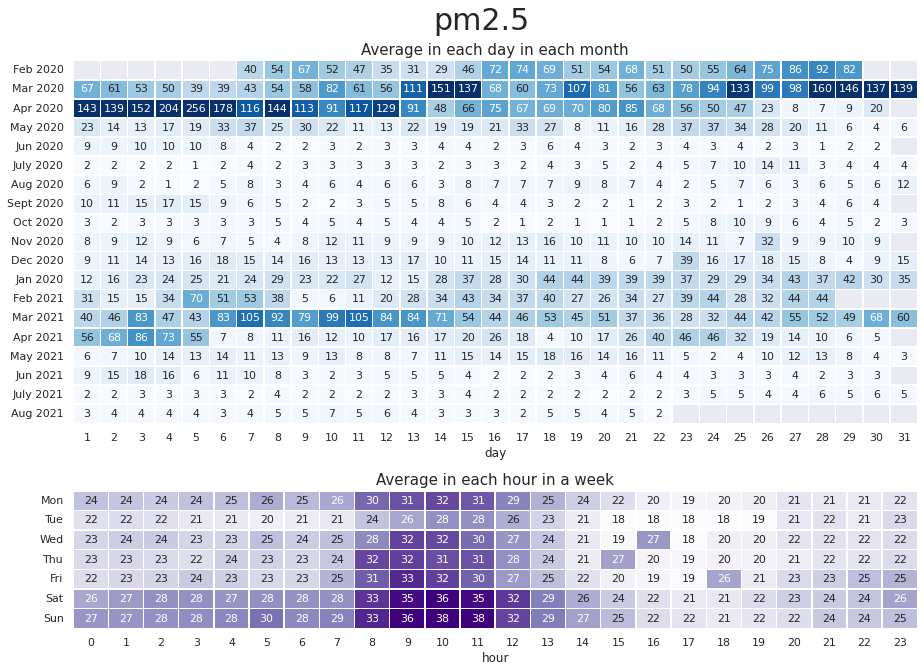

In [28]:
plot_heatmap(datasets['pm2.5'], plot='weather')

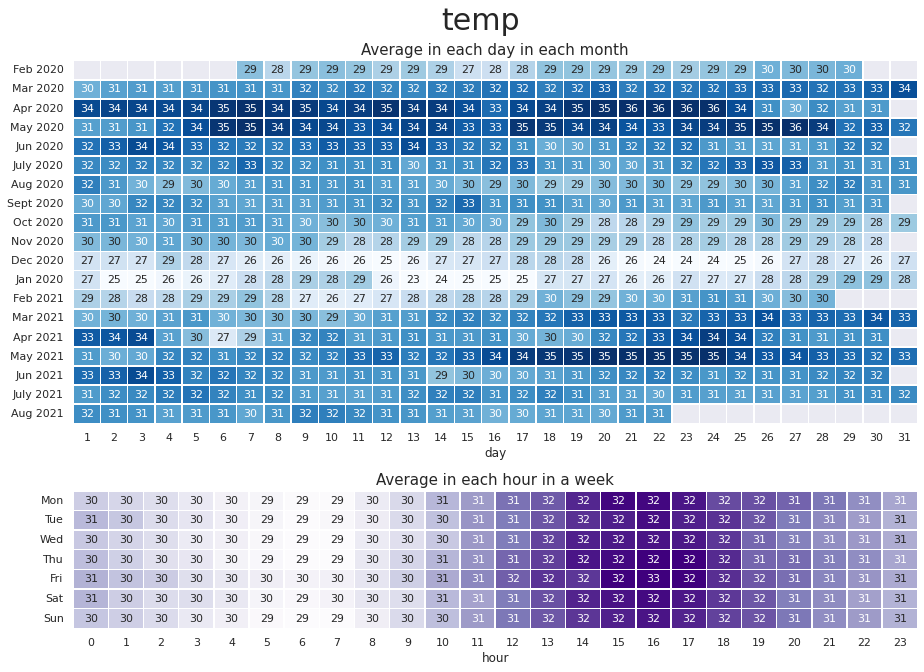

In [29]:
plot_heatmap(datasets['temp'], plot='weather')

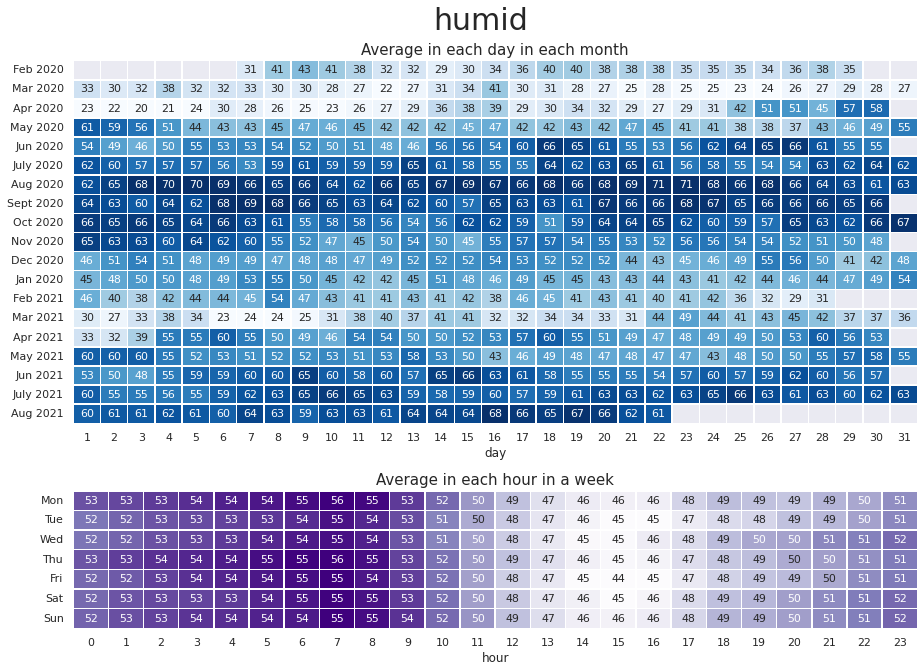

In [30]:
plot_heatmap(datasets['humid'], plot='weather')

## Smart meter plot by 20 Heatmaps

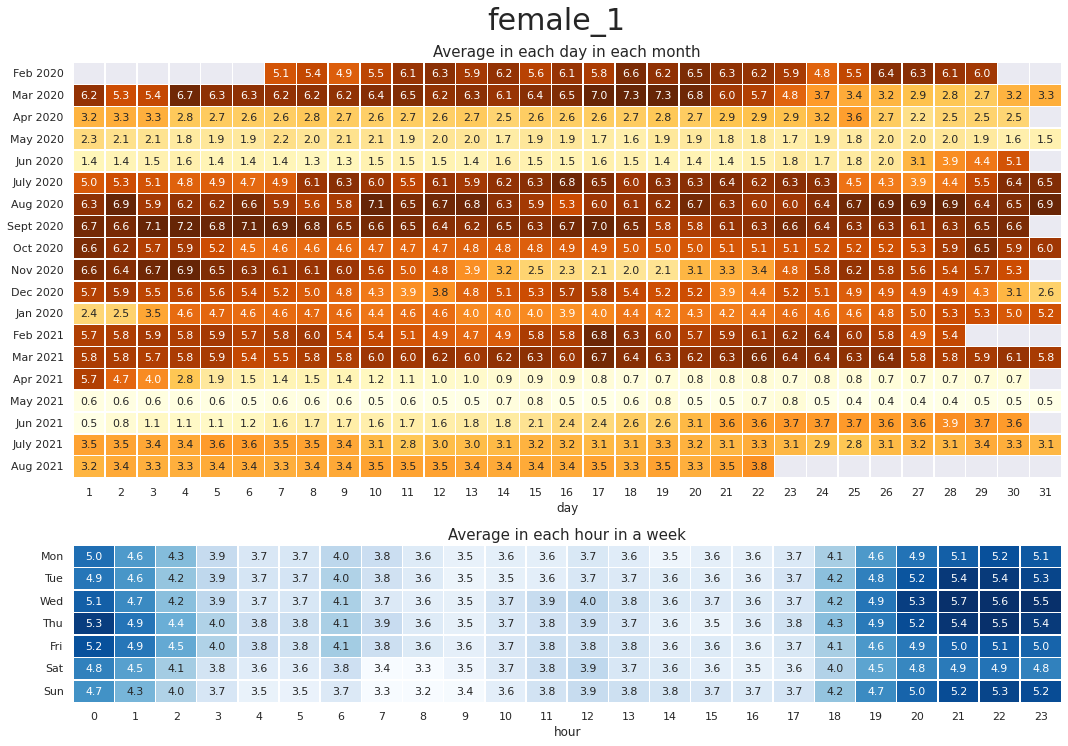

In [31]:
plot_heatmap(datasets['female_1'], plot='meter')

In [32]:
datasets.columns

Index(['pm10', 'pm2.5', 'temp', 'humid', 'female_1', 'female_2', 'female_3',
       'female_4', 'female_6', 'female_8', 'male_3', 'male_4', 'male_5',
       'bundit', 'csb2_pailom', 'dean_edu', 'food_indus', 'itsc_front',
       'language', 'mechanical_2', 'old_art', 'rh_cmu', 'serve_techsci',
       'test_animal'],
      dtype='object')

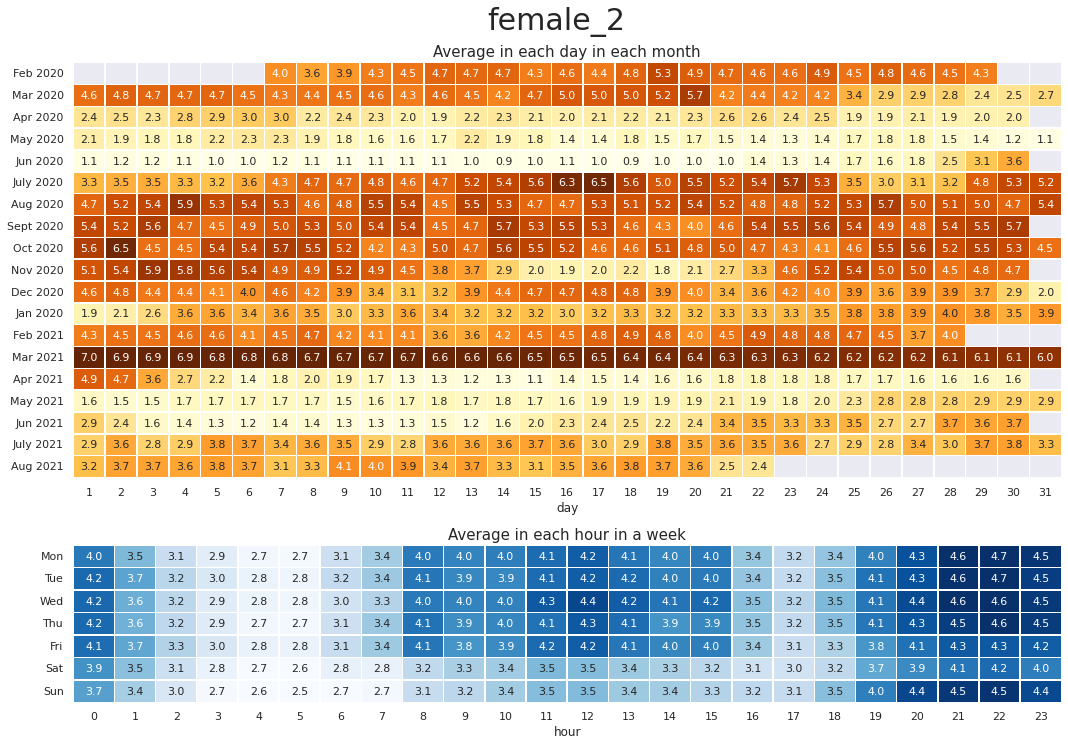

In [33]:
plot_heatmap(datasets['female_2'], plot='meter')

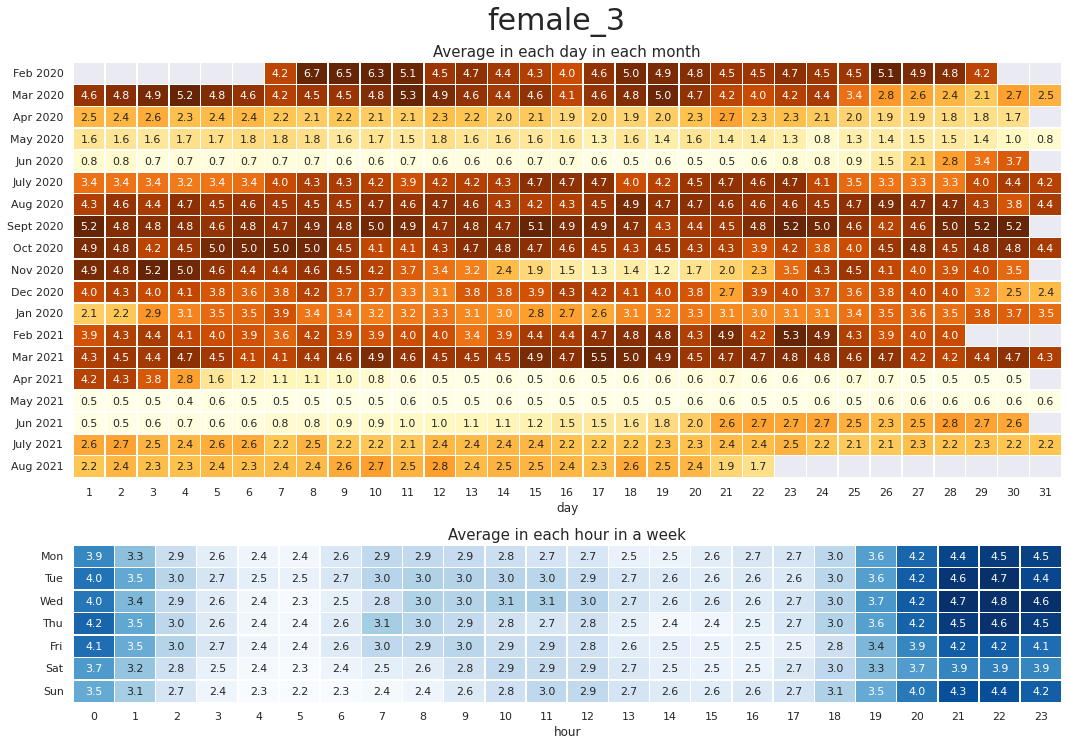

In [34]:
plot_heatmap(datasets['female_3'], plot='meter')

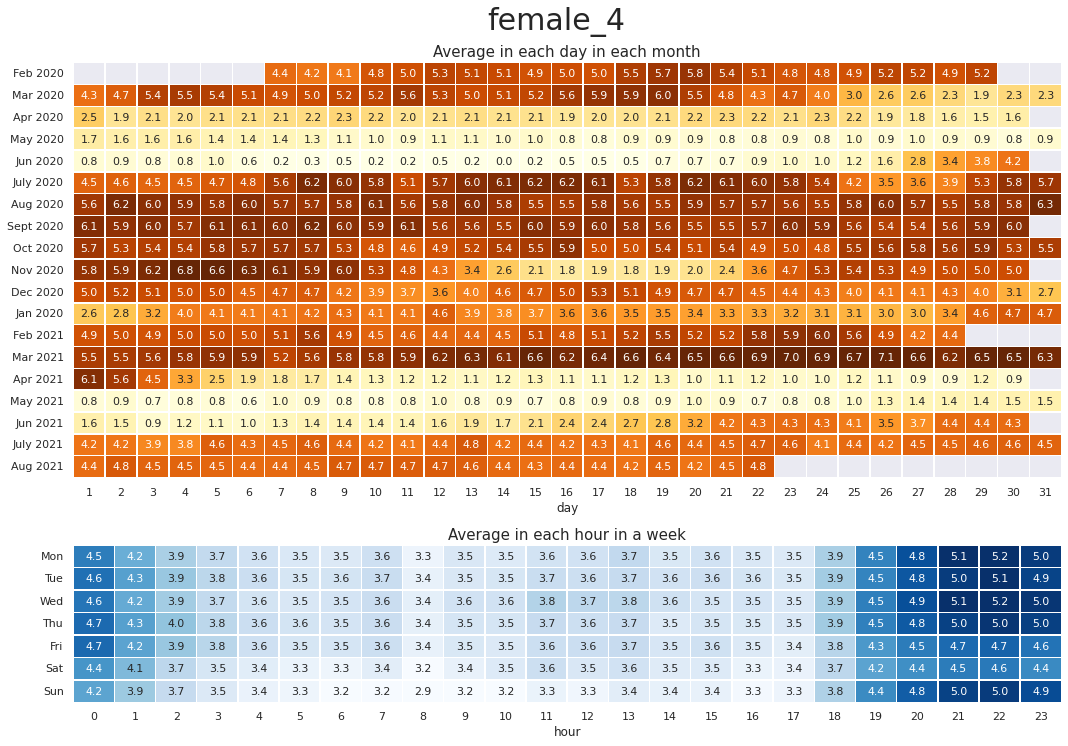

In [35]:
plot_heatmap(datasets['female_4'], plot='meter')

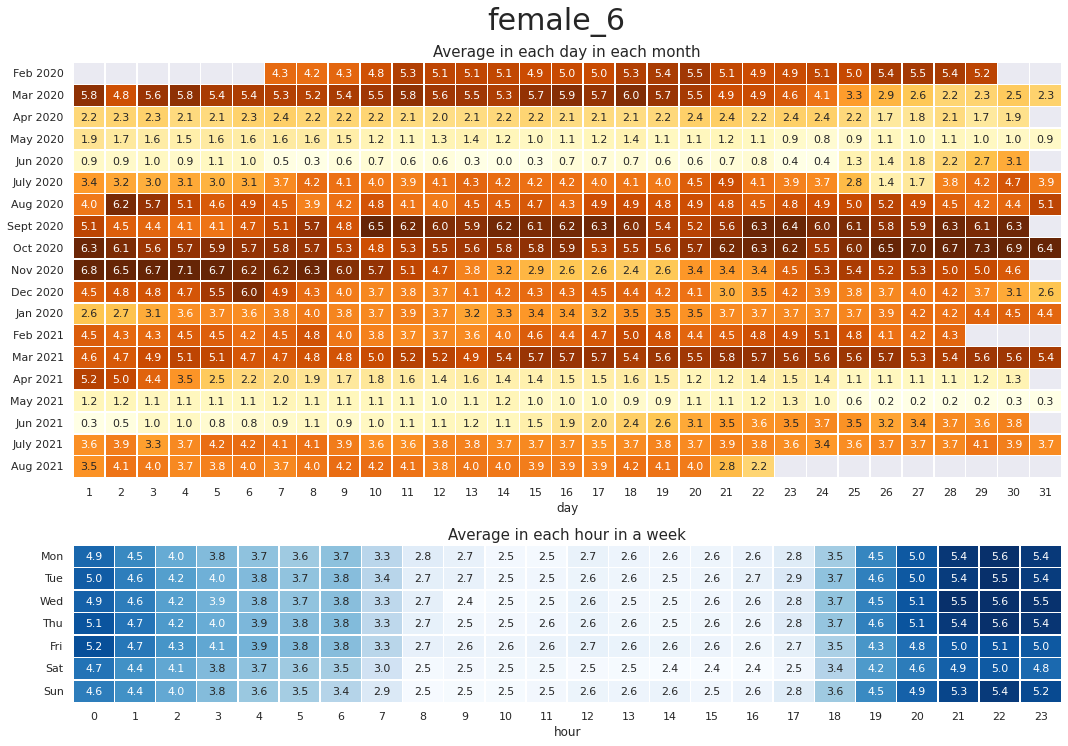

In [36]:
plot_heatmap(datasets['female_6'], plot='meter')

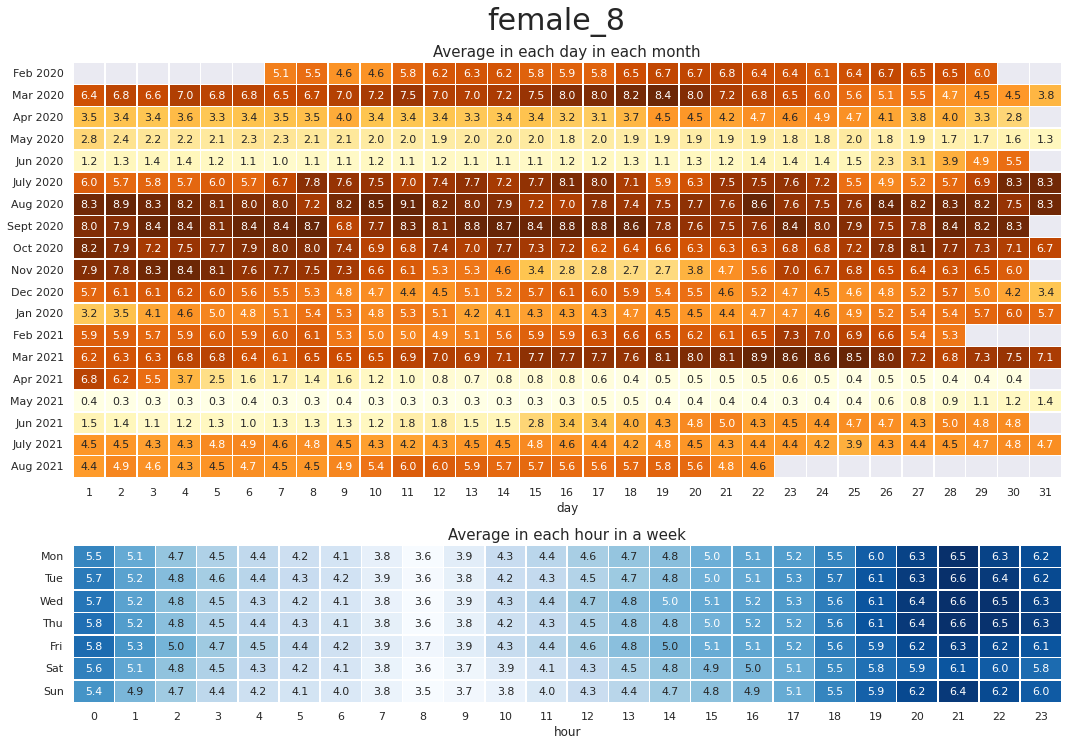

In [37]:
plot_heatmap(datasets['female_8'], plot='meter')

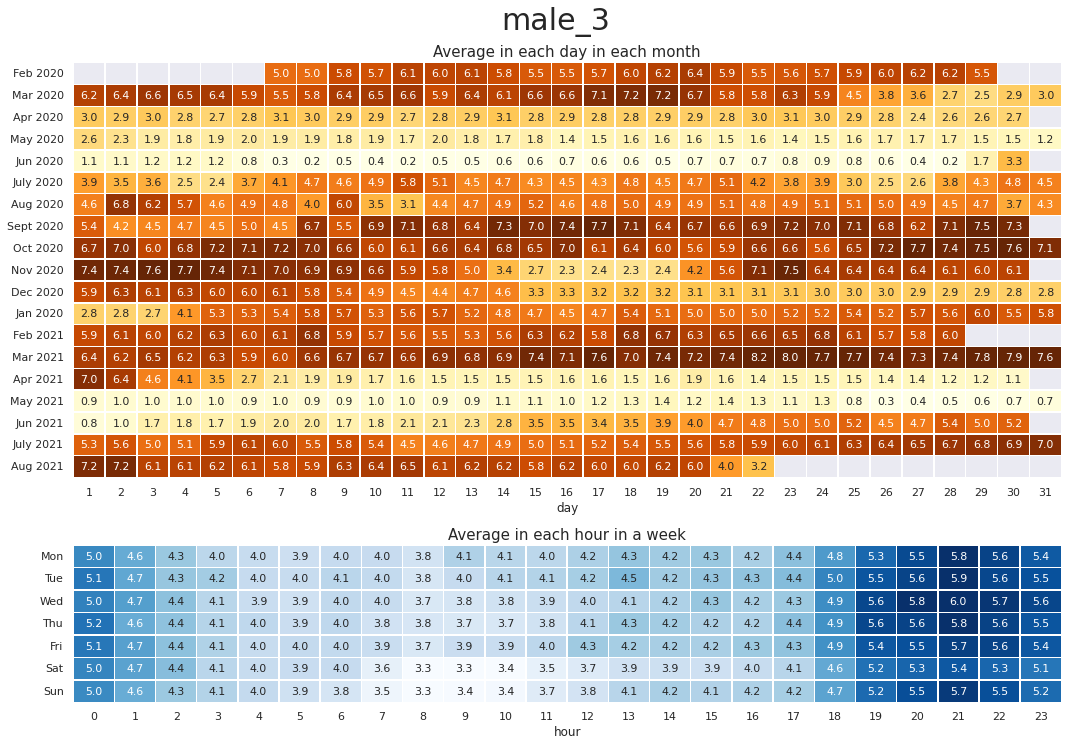

In [38]:
plot_heatmap(datasets['male_3'], plot='meter')

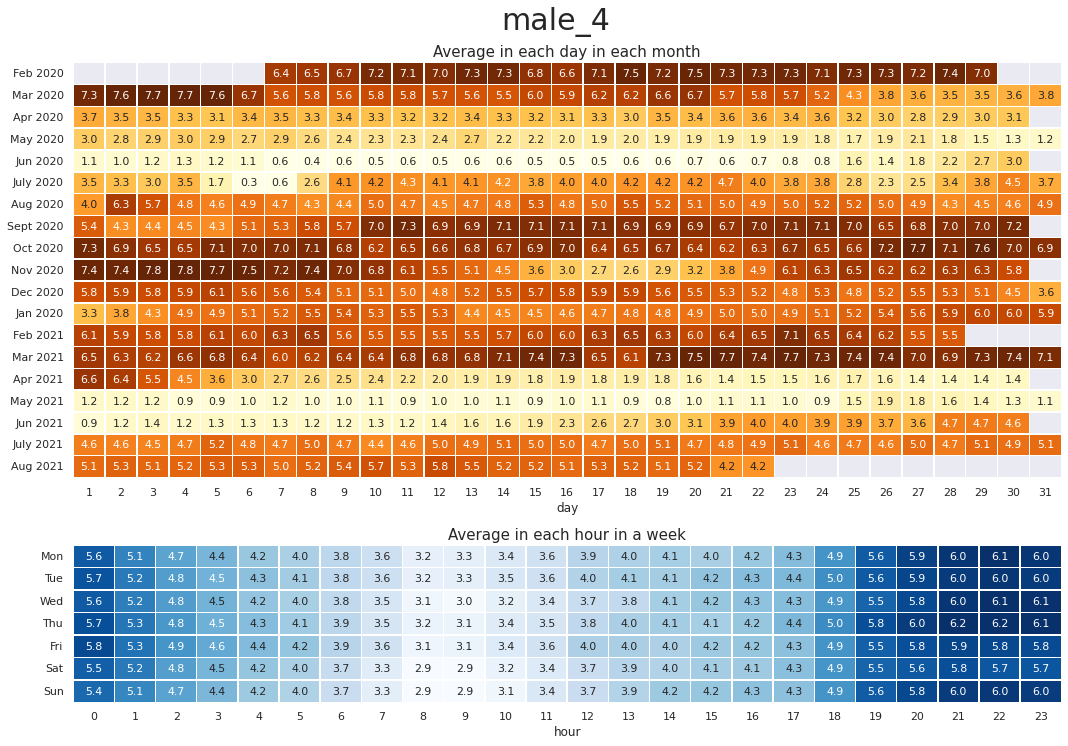

In [39]:
plot_heatmap(datasets['male_4'], plot='meter')

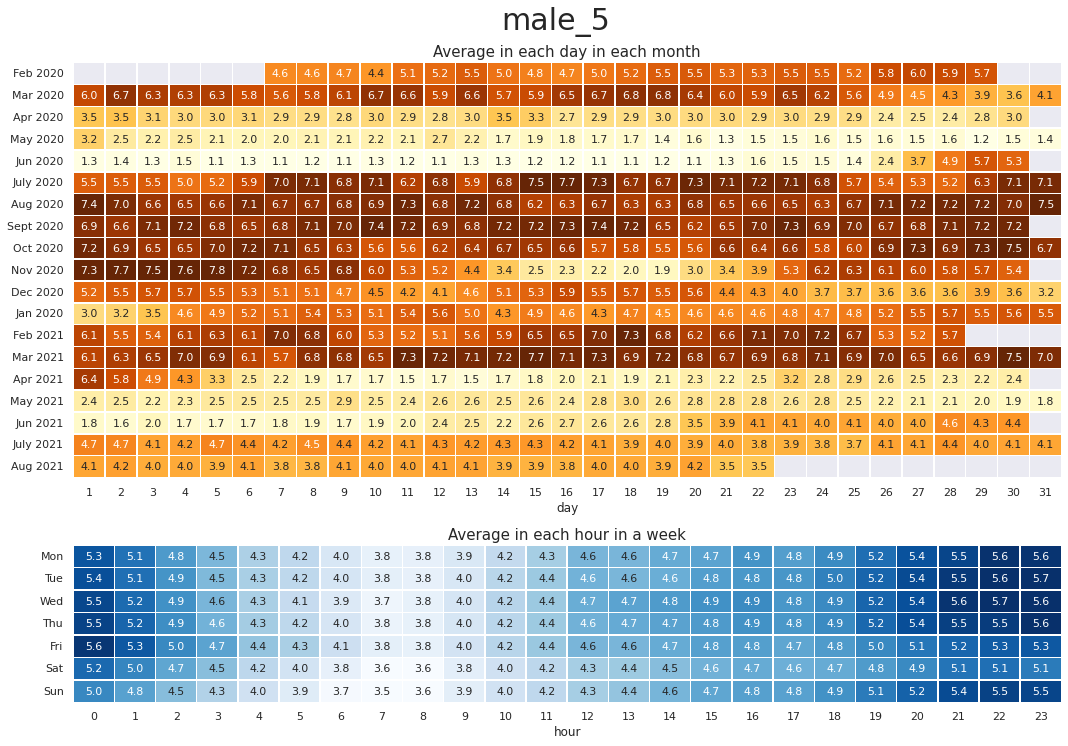

In [40]:
plot_heatmap(datasets['male_5'], plot='meter')

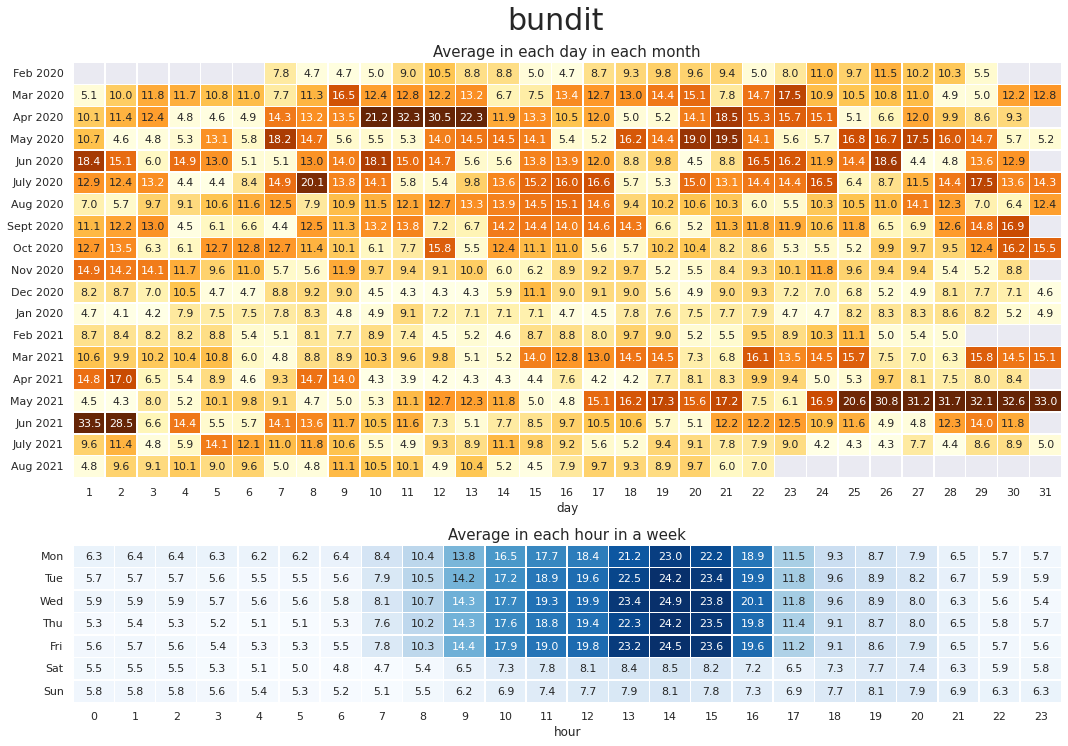

In [41]:
plot_heatmap(datasets['bundit'], plot='meter')

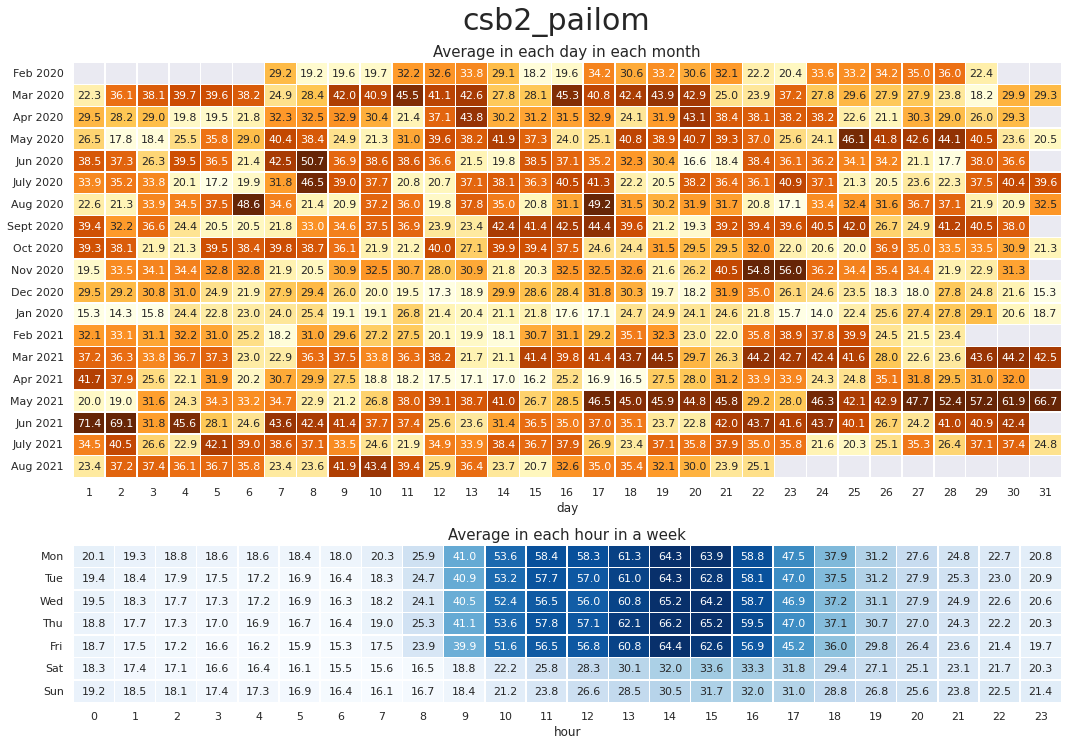

In [42]:
plot_heatmap(datasets['csb2_pailom'], plot='meter')

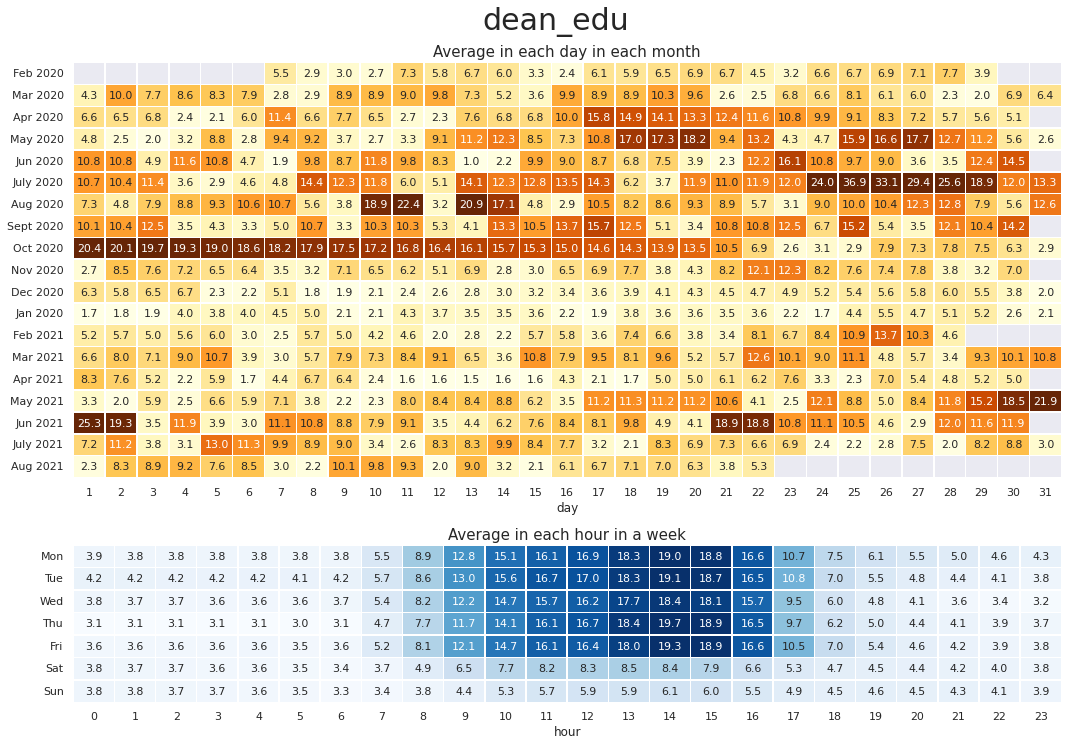

In [43]:
plot_heatmap(datasets['dean_edu'], plot='meter')

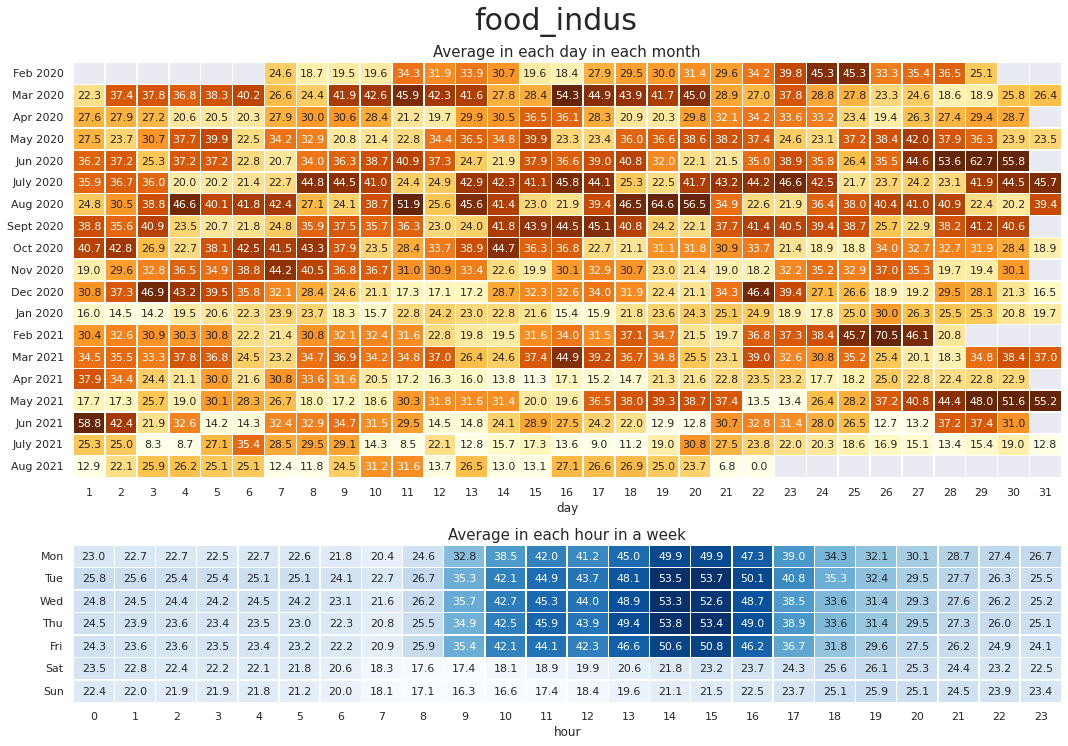

In [44]:
plot_heatmap(datasets['food_indus'], plot='meter')

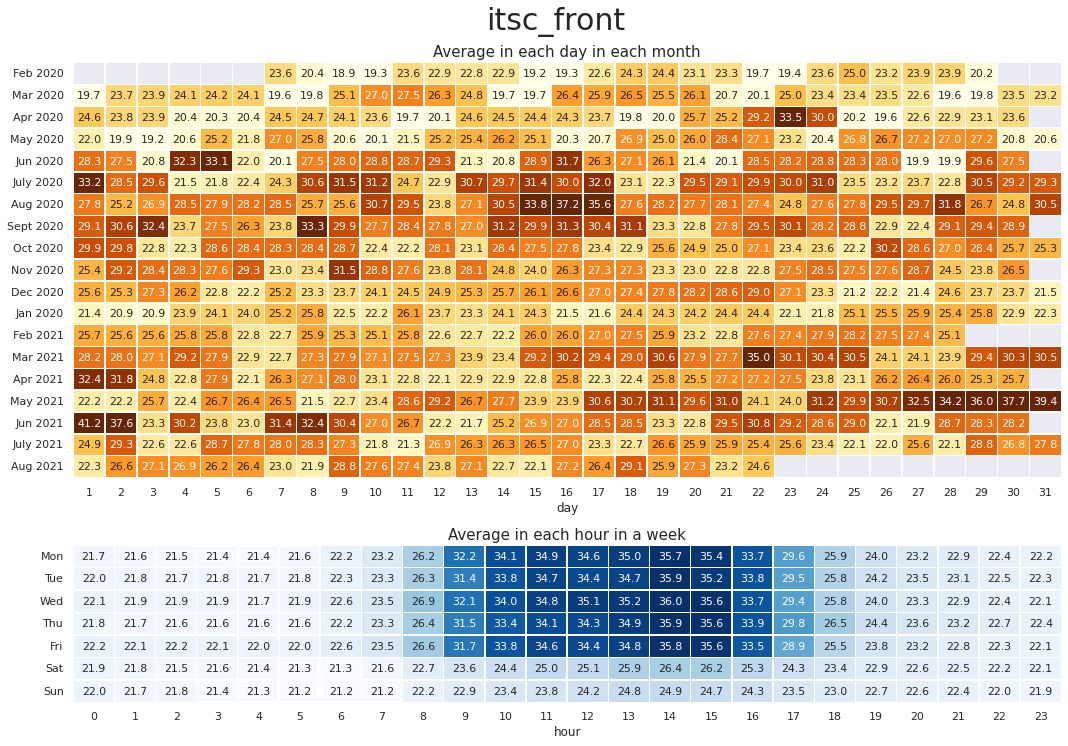

In [45]:
plot_heatmap(datasets['itsc_front'], plot='meter')

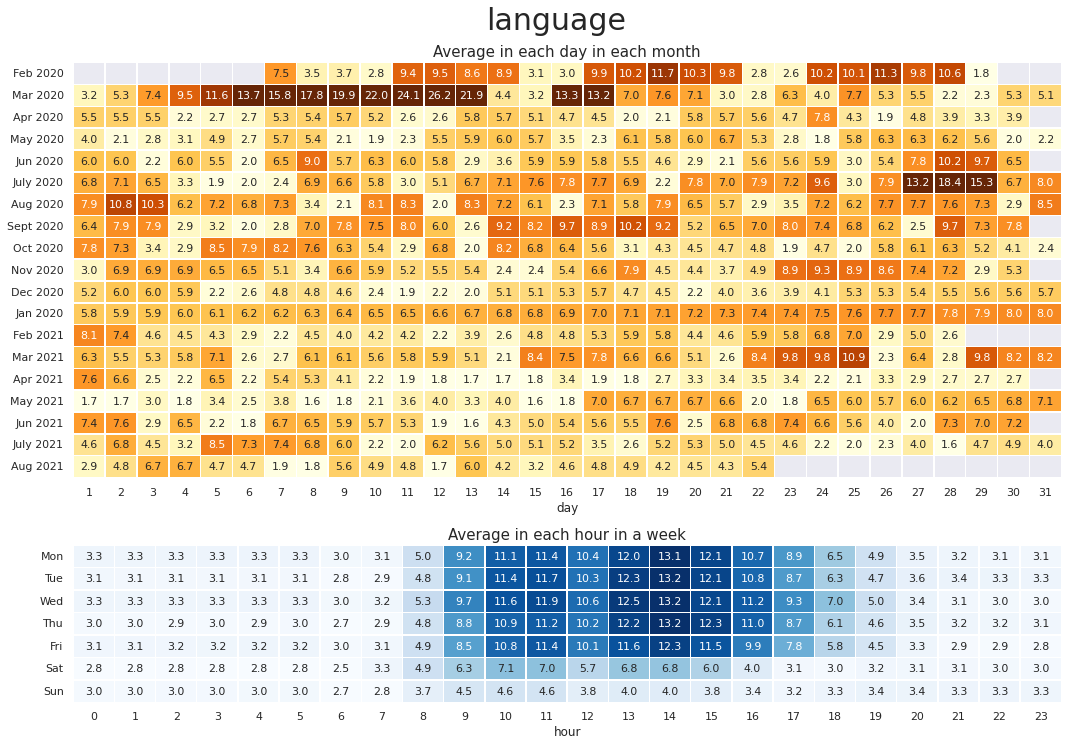

In [46]:
plot_heatmap(datasets['language'], plot='meter')

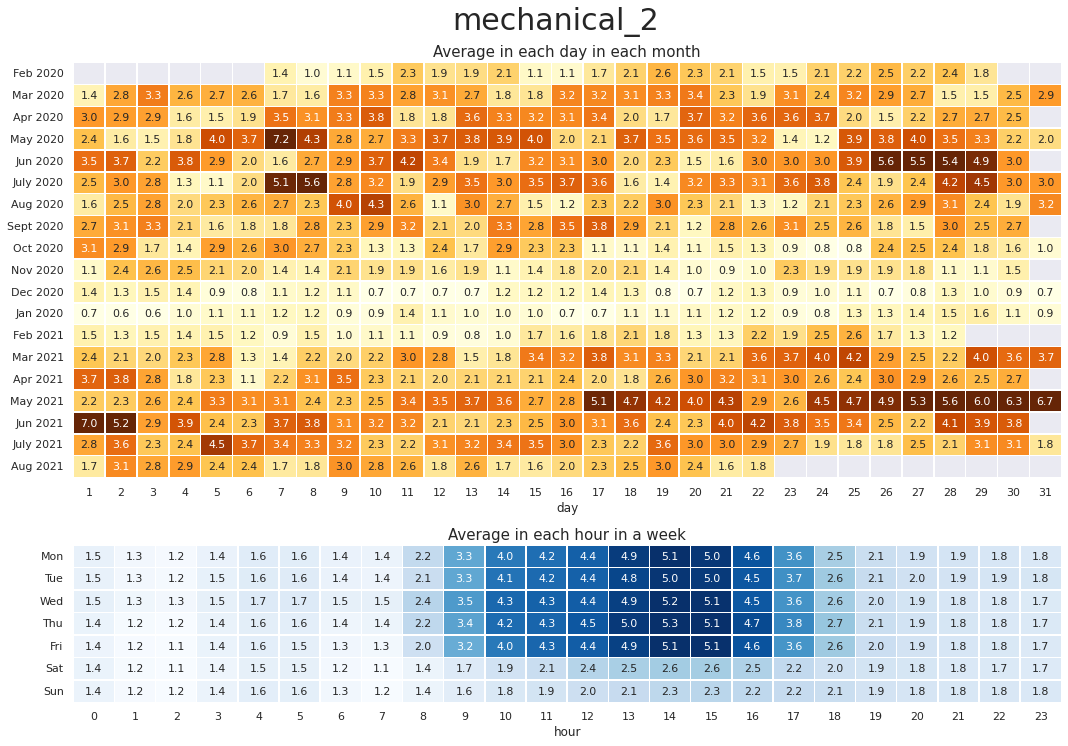

In [47]:
plot_heatmap(datasets['mechanical_2'], plot='meter')

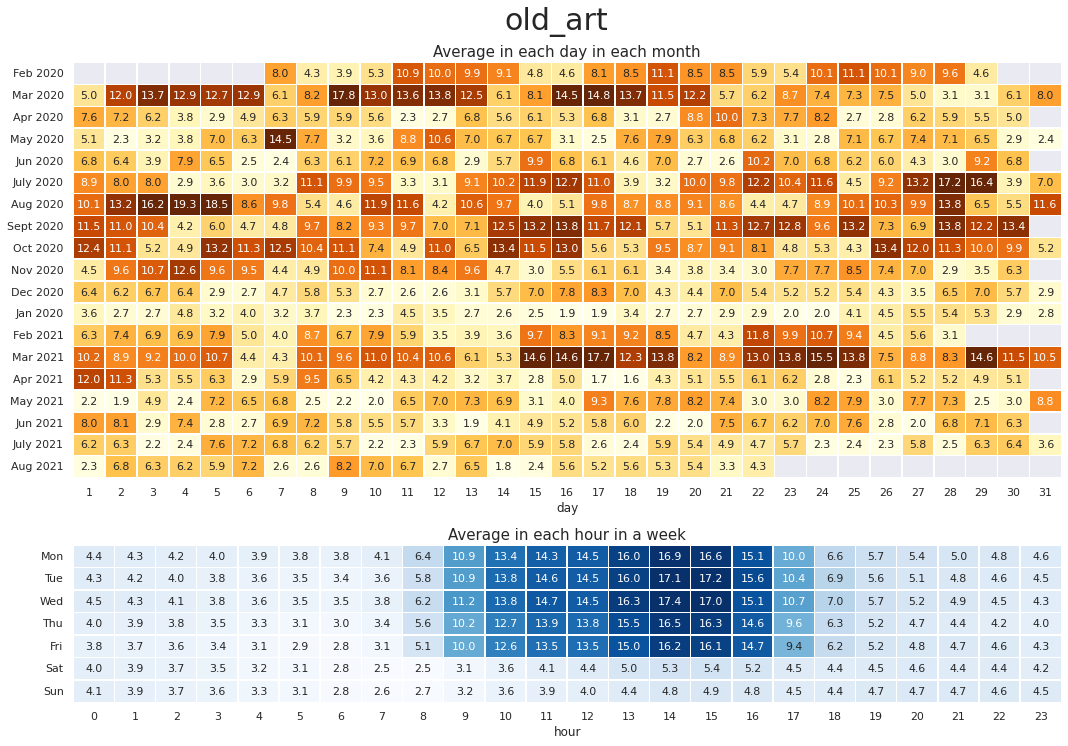

In [48]:
plot_heatmap(datasets['old_art'], plot='meter')

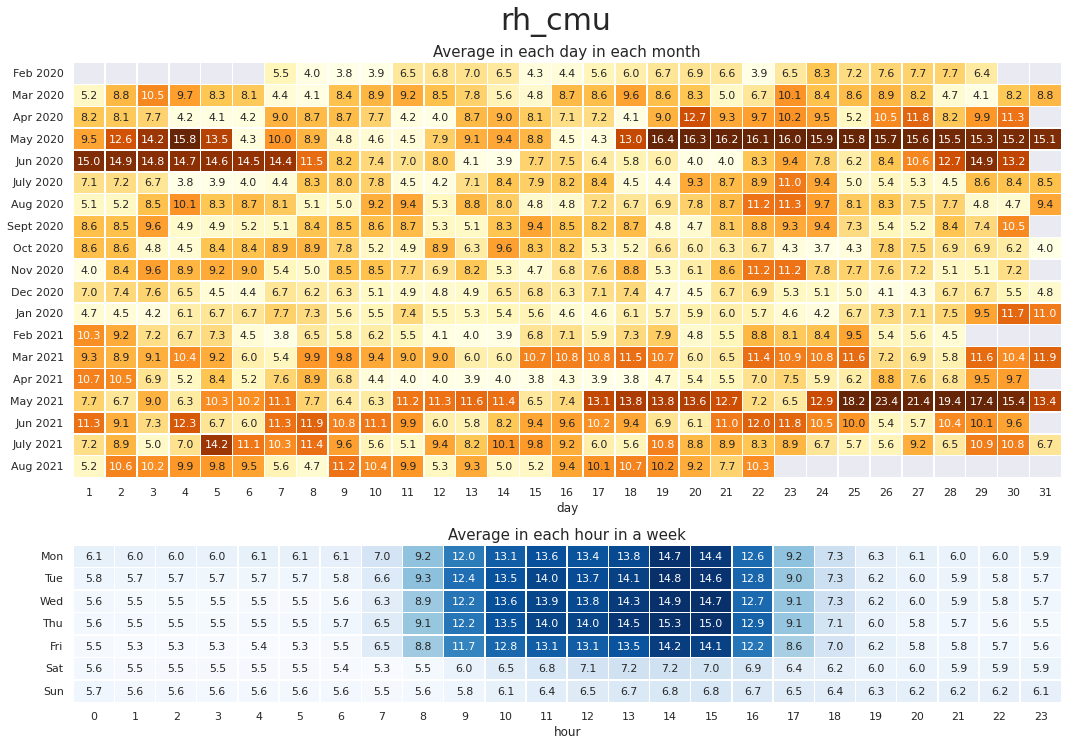

In [49]:
plot_heatmap(datasets['rh_cmu'], plot='meter')

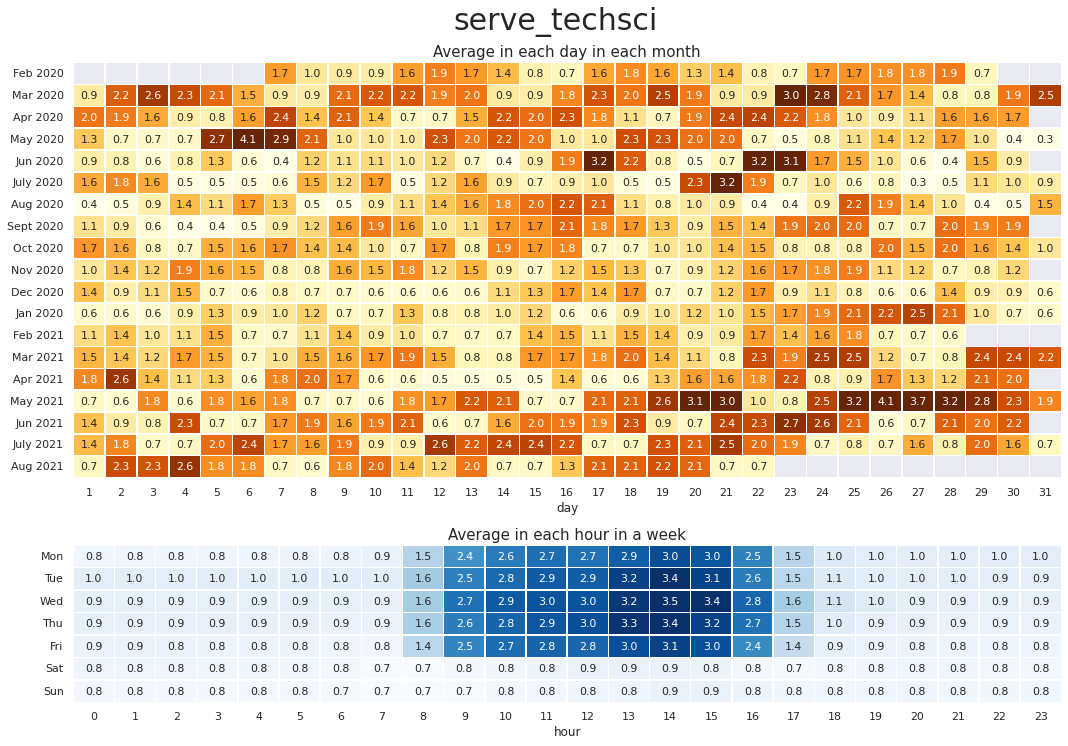

In [50]:
plot_heatmap(datasets['serve_techsci'], plot='meter')

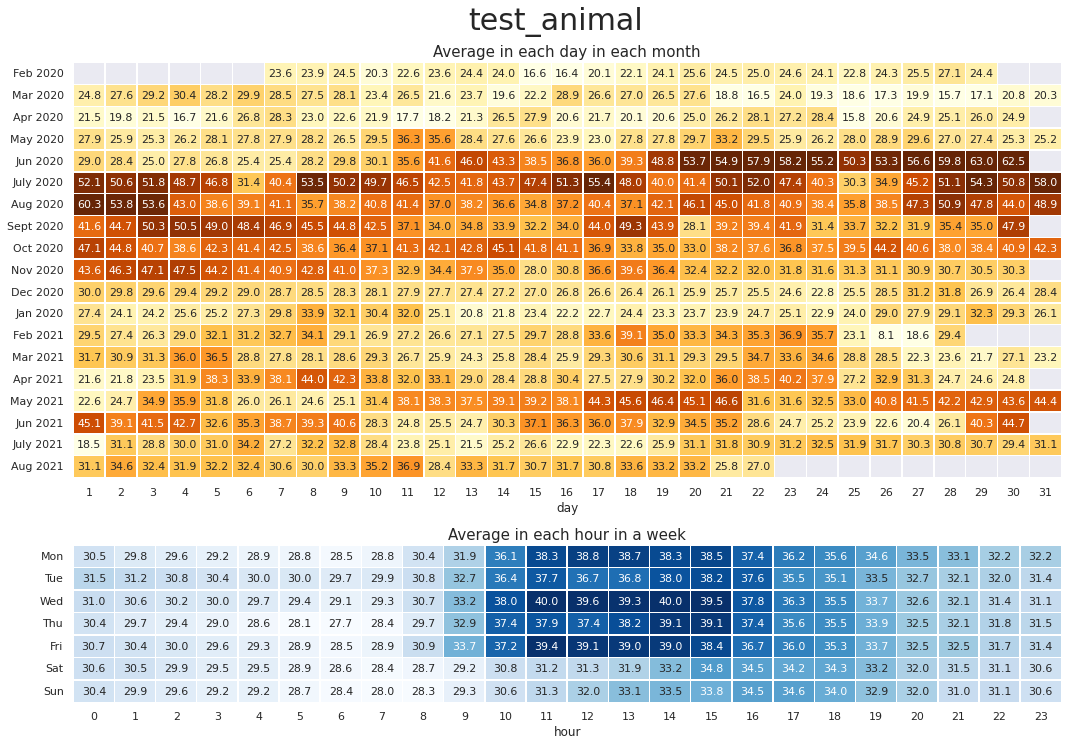

In [51]:
plot_heatmap(datasets['test_animal'], plot='meter')

# Correlation
- self correlation(ACF, PACF)
- cross correlation (cross correlation, mutual information)

https://towardsdatascience.com/computing-cross-correlation-between-geophysical-time-series-488642be7bf0

https://medium.com/swlh/a-deep-conceptual-guide-to-mutual-information-a5021031fad0

### Correlation is Not Causation 
https://towardsdatascience.com/correlation-is-not-causation-ae05d03c1f53

In [87]:
def crosscorr(datax, datay, lag=0):
  return datax.corr(datay.shift(lag))

def cross_corr_heatmap(df):
  corr_df = df.copy()  
  plt.figure(figsize=(25,10))
  ax = sns.heatmap(corr_df, vmin=-1, vmax=1,
                    cmap='coolwarm',annot=True, linewidth=0.3)
  for text in ax.texts:
      t = float(text.get_text())
      if -0.1 < t < 0.1:
          text.set_text('')
      else:
          text.set_text(round(t, 2))
  plt.show()

## Pearson Correlation (Overall)

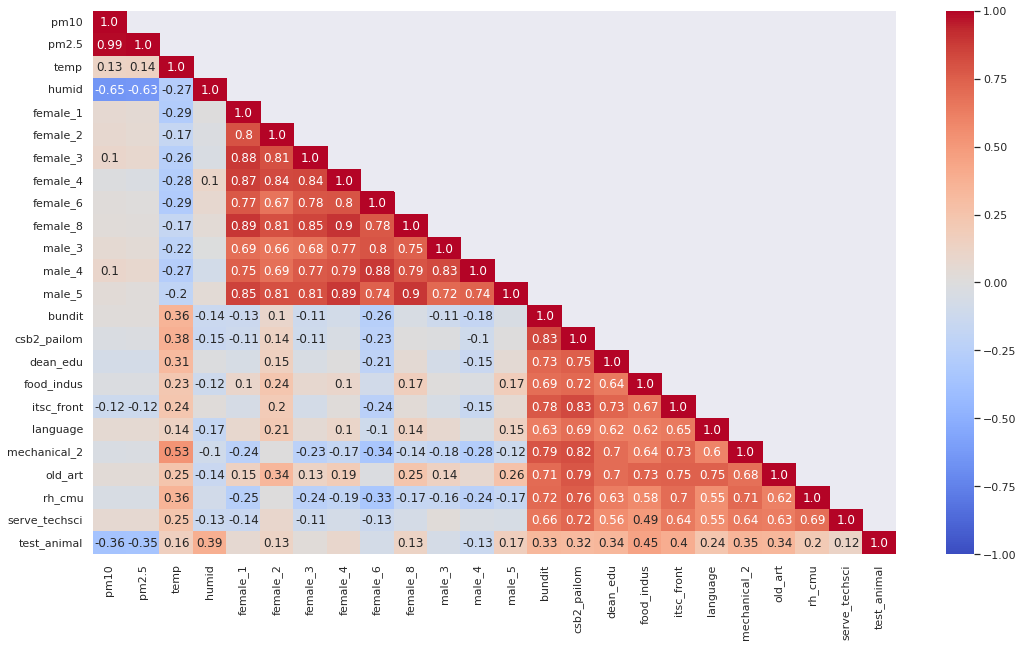

In [92]:
corr_df = datasets.corr()
mask = np.triu(np.ones_like(corr_df), k=1)
plt.figure(figsize=(18,10))
ax = sns.heatmap(corr_df, vmin=-1, vmax=1,
                  cmap='coolwarm',mask=mask, fmt='.2f',annot=True)

for text in ax.texts:
    t = float(text.get_text())
    if -0.1 < t < 0.1:
        text.set_text('')
    else:
        text.set_text(round(t, 2))
plt.show()

## Pearson Correlation (Energy VS Weather)

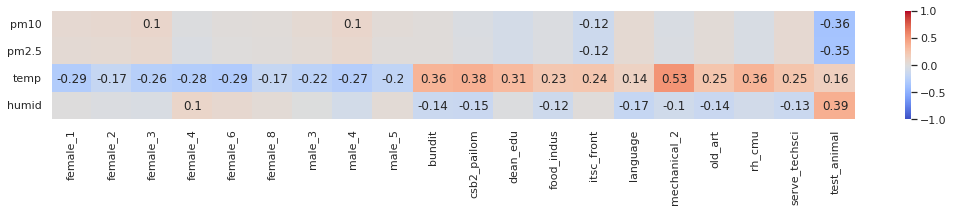

In [97]:
corr_df = datasets.corr().iloc[:4, 4:]
plt.figure(figsize=(18,2))
ax = sns.heatmap(corr_df, vmin=-1, vmax=1,
                  cmap='coolwarm', fmt='.2f',annot=True)

for text in ax.texts:
    t = float(text.get_text())
    if -0.1 < t < 0.1:
        text.set_text('')
    else:
        text.set_text(round(t, 2))
plt.show()

## Cross Correlation (Energy VS Weather)

In [77]:
total_corr= dict()
for weather in datasets.iloc[:,:4].columns:
    each_weather = []
    datax = datasets[weather]
    for meter in datasets.iloc[:, 4:].columns:
        datay = datasets[meter]
        each_building = [crosscorr(datax, datay, lag=i) for i in range(-16,17)]
        each_weather.append(each_building)
    total_corr[weather] = pd.DataFrame(each_weather, columns=np.arange(-16,17), index=datasets.iloc[:, 4:].columns)

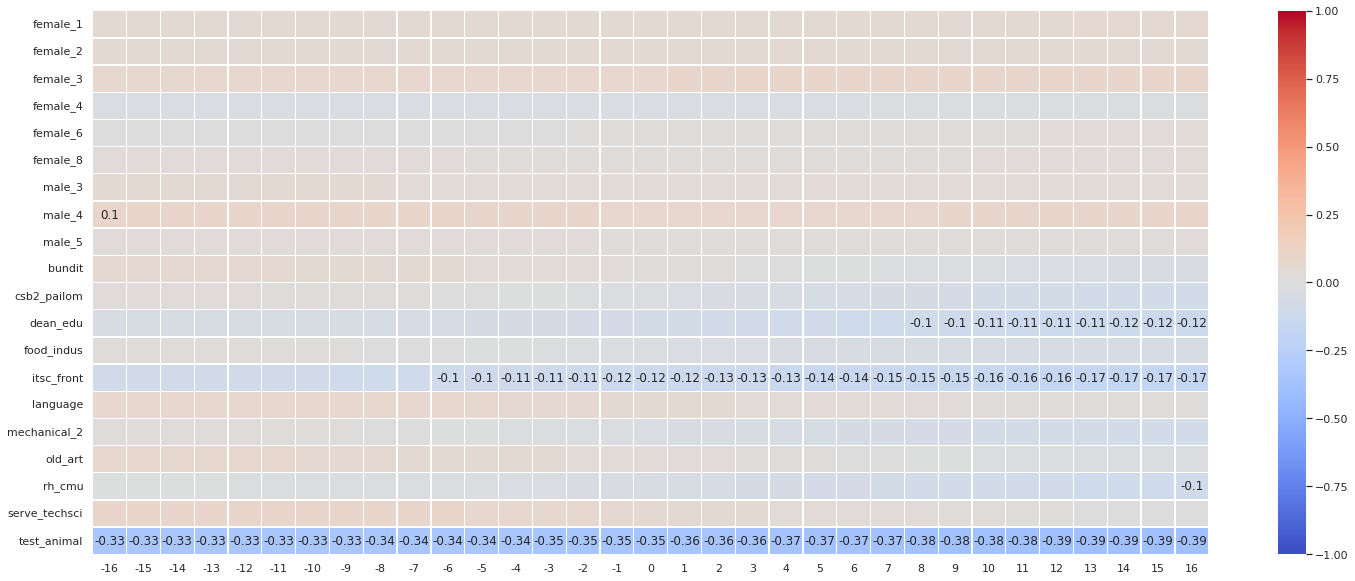

In [78]:
cross_corr_hearmap(total_corr['pm2.5'])

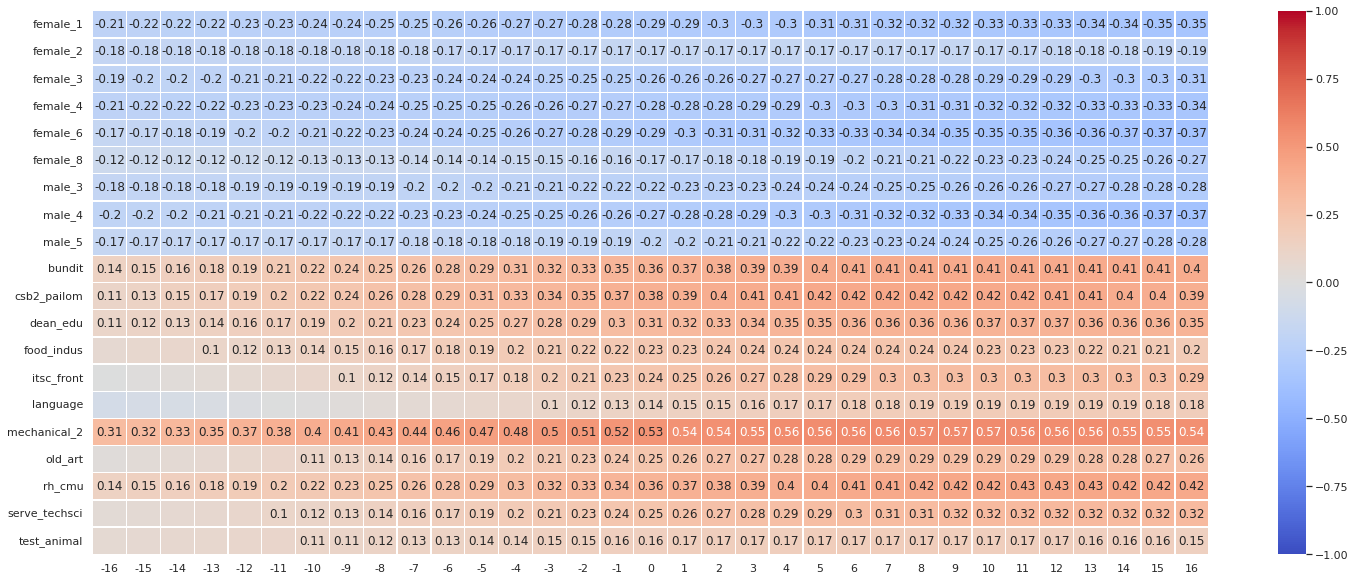

In [79]:
cross_corr_hearmap(total_corr['temp'])

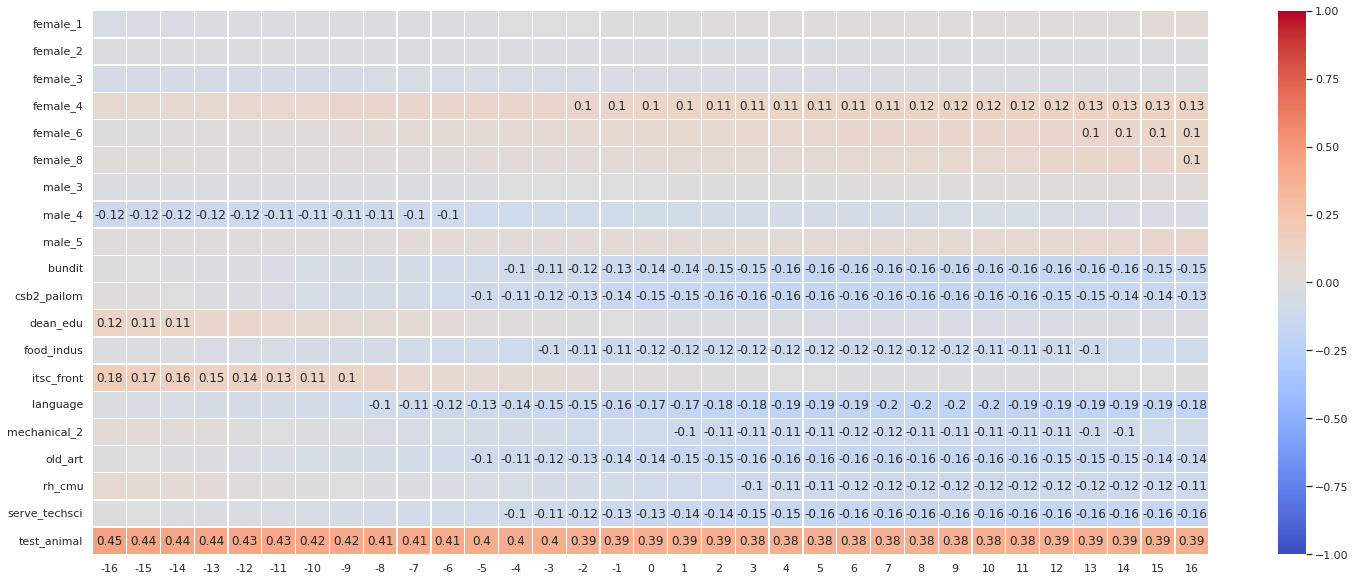

In [80]:
cross_corr_hearmap(total_corr['humid'])

In [81]:
# Humid ==> Air condition

# test_animal has positive corr why?